In [ ]:
#考虑一个用于 3 类别分类的神经网络，结构如下：

#一个输入节点 (x) (输入一个批次的 (X))
#第一个隐藏层，包含 2 个 神经元 (h^{(1)}_1, h^{(1)}_2)，使用 Tanh 激活函数。
#第二个隐藏层，包含 2 个 神经元 (h^{(2)}_1, h^{(2)}_2)，使用 Tanh 激活函数。
#3 个 输出节点（对应3个类别），使用 Softmax 激活函数。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#激活函数tanh
def tanh(a):
  return np.tanh(a)

In [ ]:
#分类激活函数 softmax
def softmax(a):
  a_max = np.max(a, axis=1, keepdims=True)
  z= np.exp(a - a_max)

  sums = np.sum(z, axis=1, keepdims=True)
  return z / sums

In [ ]:
#前向传播，求输出y_pred
def forward(w1, w2, w3, b1, b2, b3, x):
  z1 = np.dot(x, w1) + b1 #shape (2,2)
  h1 = tanh(z1) #shape (2,2)

  z2 = np.dot(h1, w2) + b2 #shape (2,2)
  h2 = tanh(z2) #shape (2,2)

  z3 = np.dot(h2, w3) + b3 #shape (2,3)
  y_pred = softmax(z3)
  return h1, h2, y_pred


In [ ]:
#求损失函数loss
def compute_loss(y_pred, y_true):
  loss = -(y_true * np.log(y_pred + 1e-10))
  return loss

In [60]:
#反向传播，求梯度计算
def backward(y_pred, y_true, w1, w2, h1, h2, x):
  dz3 = y_pred - y_true #shape (2,3)
  b3_grad = np.mean(dz3, axis=0, keepdims=True)
  w3_grad = np.dot(h2.T, dz3) / h2.shape[0] #shape (2,3) w3.shape(hidden_dim, output_dim), h2.shape(batch_size, hidden_dim) ,dz3.shape(batch_size, output_dim)

  dh2 = np.dot(dz3, w3.T) #shape (2,2)
  dz2 = dh2 * (1- h2**2) #shape (2,2)
  b2_grad = np.mean(dz2, axis=0, keepdims=True)
  w2_grad = np.dot(h1.T, dz2) / h1.shape[0] #shape(2,2) w2.shape(hidden_dim, output_dim), h1.shape(batch_size, hidden_dim) ,dz2.shape(batch_size, output_dim)

  dh1 = np.dot(dz2, w2.T) # shape (2,2)
  dz1 = dh1 * (1- h1**2)
  b1_grad = np.mean(dz1, axis=0, keepdims=True)
  w1_grad = np.dot(x.T, dz1) / x.shape[0]

  return w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad

In [ ]:
#更新参数
def update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate):
  w1 -= learning_rate * w1_grad
  w2 -= learning_rate * w2_grad
  w3 -= learning_rate * w3_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  b3 -= learning_rate * b3_grad
  return w1, w2, w3, b1, b2, b3

epoch: 1 loss [[1.0583 0.     0.    ]
 [0.     0.     0.8358]] w1 [ 0.5 -0.1] w2 [ 0.3 -0.4  0.1  0.2] w3 [ 0.4 -0.2  0.1 -0.3  0.1  0.5] b1 [ 0.2 -0.2] b2 [-0.1  0.3] b3 [ 0.1 -0.1  0.2]
epoch: 101 loss [[0.6114 0.     0.    ]
 [0.     0.     0.6021]] w1 [ 0.75 -0.21] w2 [ 0.45 -0.7   0.04  0.29] w3 [ 0.52 -0.2  -0.02 -0.47  0.05  0.71] b1 [ 0.2 -0.2] b2 [0.06 0.23] b3 [ 0.31 -0.44  0.33]
epoch: 201 loss [[0.2986 0.     0.    ]
 [0.     0.     0.3381]] w1 [ 0.98 -0.33] w2 [ 0.62 -0.98 -0.03  0.39] w3 [ 0.68 -0.22 -0.16 -0.7   0.03  0.97] b1 [ 0.17 -0.19] b2 [0.12 0.21] b3 [ 0.41 -0.65  0.44]
epoch: 301 loss [[0.1656 0.     0.    ]
 [0.     0.     0.1966]] w1 [ 1.11 -0.41] w2 [ 0.75 -1.14 -0.09  0.47] w3 [ 0.8  -0.23 -0.27 -0.88  0.01  1.17] b1 [ 0.14 -0.18] b2 [0.13 0.21] b3 [ 0.47 -0.78  0.52]
epoch: 401 loss [[0.1084 0.     0.    ]
 [0.     0.     0.1299]] w1 [ 1.18 -0.47] w2 [ 0.83 -1.23 -0.14  0.51] w3 [ 0.89 -0.23 -0.36 -1.   -0.01  1.31] b1 [ 0.13 -0.18] b2 [0.13 0.2 ] b3 [ 0.51

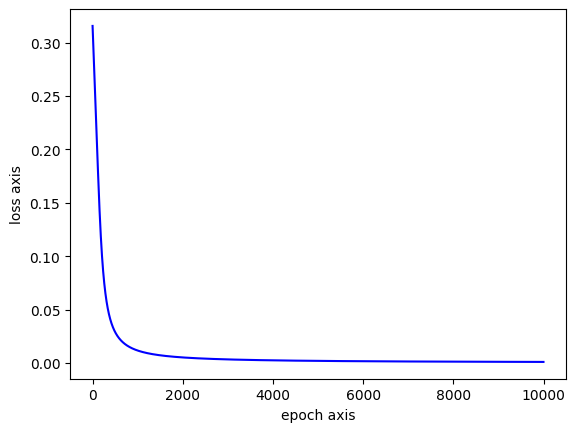

In [61]:
#初始化参数
w1 = np.array([[0.5, -0.1]]) #shape (1,2)

b1 = np.array([[0.2, -0.2]]) #shape (1,2)

w2 = np.array([[0.3, -0.4],
        [0.1, 0.2]]) #shape (2,2)

b2 = np.array([[-0.1, 0.3]]) #shape (1,2)

w3 = np.array([[0.4, -0.2, 0.1],
        [-0.3, 0.1, 0.5]]) #shape (2,3)

b3 = np.array([[0.1, -0.1, 0.2]]) #shape (1,3)

x = np.array([[1.0],
        [-1.0]]) #shape (2,1)

y_true = np.array([[1, 0, 0],
          [0, 0, 1]]) #shape (2,3)

learning_rate = 0.015
losses = []

epochs = 10000

for epoch in range(epochs):
  h1, h2, y_pred = forward(w1, w2, w3, b1, b2, b3, x)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss.mean().flatten())

  w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad = backward(y_pred, y_true, w1, w2, h1, h2, x)
  w1, w2, w3, b1, b2, b3 = update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate)

  if epoch%100 == 0:
    print("epoch:", epoch + 1,
      "loss", np.round(loss, 4),
      "w1", np.round(w1.flatten(), 2),
      "w2", np.round(w2.flatten(), 2),
      "w3", np.round(w3.flatten(), 2),
      "b1", np.round(b1.flatten(), 2),
      "b2", np.round(b2.flatten(), 2),
      "b3", np.round(b3.flatten(), 2)
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt

In [62]:
#前向传播，求输出y_pred
def th_forward(w1, w2, w3, b1, b2, b3, x):
  z1 = torch.matmul(x, w1) + b1 #shape (2,2)
  h1 = torch.tanh(z1) #shape (2,2)

  z2 = torch.matmul(h1, w2) + b2 #shape (2,2)
  h2 = torch.tanh(z2) #shape (2,2)

  z3 = torch.matmul(h2, w3) + b3 #shape (2,3)
  y_pred = torch.softmax(z3, dim=1)
  return h1, h2, y_pred

In [ ]:
#计算损失函数loss，
def th_compute_loss(y_pred, y_true):
  loss = -torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_pred.shape[0]
  return loss

epoch: 1 loss: 0.9471 w1: [ 0.5 -0.1] w2: [ 0.3 -0.4  0.1  0.2] w3: [ 0.4 -0.2  0.1 -0.3  0.1  0.5] b1: [ 0.2 -0.2] b2: [-0.1  0.3] b3: [ 0.1 -0.1  0.2]
epoch: 101 loss: 0.7231 w1: [ 0.66 -0.17] w2: [ 0.4  -0.59  0.06  0.26] w3: [ 0.47 -0.2   0.03 -0.39  0.06  0.63] b1: [ 0.21 -0.2 ] b2: [0.02 0.25] b3: [ 0.26 -0.34  0.29]
epoch: 201 loss: 0.4938 w1: [ 0.84 -0.25] w2: [ 0.51 -0.8   0.01  0.33] w3: [ 0.57 -0.21 -0.06 -0.55  0.04  0.8 ] b1: [ 0.19 -0.2 ] b2: [0.08 0.22] b3: [ 0.35 -0.52  0.37]
epoch: 301 loss: 0.3183 w1: [ 0.98 -0.33] w2: [ 0.62 -0.98 -0.03  0.39] w3: [ 0.68 -0.22 -0.15 -0.7   0.03  0.97] b1: [ 0.17 -0.19] b2: [0.11 0.21] b3: [ 0.41 -0.65  0.44]
epoch: 401 loss: 0.2148 w1: [ 1.08 -0.39] w2: [ 0.71 -1.09 -0.08  0.45] w3: [ 0.76 -0.23 -0.24 -0.83  0.02  1.11] b1: [ 0.15 -0.19] b2: [0.13 0.21] b3: [ 0.45 -0.74  0.49]
epoch: 501 loss: 0.1554 w1: [ 1.14 -0.43] w2: [ 0.78 -1.17 -0.11  0.48] w3: [ 0.83 -0.23 -0.3  -0.92  0.    1.22] b1: [ 0.14 -0.18] b2: [0.13 0.2 ] b3: [ 0.48 

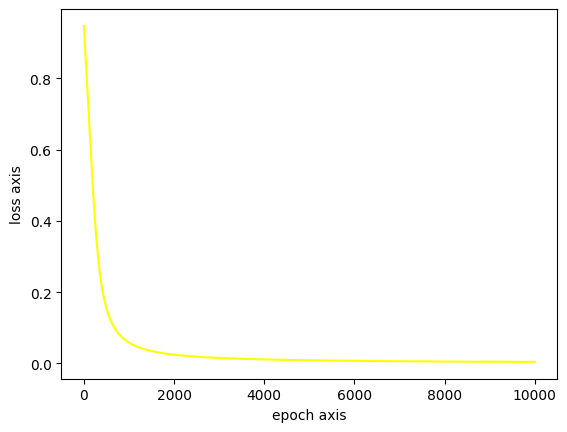

In [63]:
#初始化参数
w1 = torch.tensor([[0.5, -0.1]],requires_grad=True) #shape (1,2)

b1 = torch.tensor([[0.2, -0.2]],requires_grad=True) #shape (1,2)

w2 = torch.tensor([[0.3, -0.4],
          [0.1, 0.2]],requires_grad=True) #shape (2,2)

b2 = torch.tensor([[-0.1, 0.3]],requires_grad=True) #shape (1,2)

w3 = torch.tensor([[0.4, -0.2, 0.1],
          [-0.3, 0.1, 0.5]],requires_grad=True) #shape (2,3)

b3 = torch.tensor([[0.1, -0.1, 0.2]],requires_grad=True) #shape (1,3)

x = torch.tensor([[1.0],
          [-1.0]]) #shape (2,1)

y_true = torch.tensor([[1, 0, 0],
            [0, 0, 1]]) #shape (2,3)

learning_rate = 0.01
losses = []
epochs = 10000

for epoch in range(epochs):
  h1, h2, y_pred = th_forward(w1, w2, w3, b1, b2, b3, x)
  loss = th_compute_loss(y_pred, y_true)
  losses.append(loss.item())

  if w1.grad is not None:
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
    b3.grad.zero_()

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w3 -= learning_rate * w3.grad
    b1 -= learning_rate * b1.grad
    b2 -= learning_rate * b2.grad
    b3 -= learning_rate * b3.grad

  if epoch%100 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}",
      f"w1: {w1.flatten().detach().numpy().round(2)}",
      f"w2: {w2.flatten().detach().numpy().round(2)}",
      f"w3: {w3.flatten().detach().numpy().round(2)}",
      f"b1: {b1.flatten().detach().numpy().round(2)}",
      f"b2: {b2.flatten().detach().numpy().round(2)}",
      f"b3: {b3.flatten().detach().numpy().round(2)}"
      )

plt.plot(range(epochs), losses, "yellow")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()